## INSTALL LIBRARIES

In [11]:
pip install numpy matplotlib

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in c:\users\toan cau\appdata\local\programs\python\python313\lib\site-packages (2.1.3)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## LINEAR REGRESSION (NOT USING GRADIENT DESCENT)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

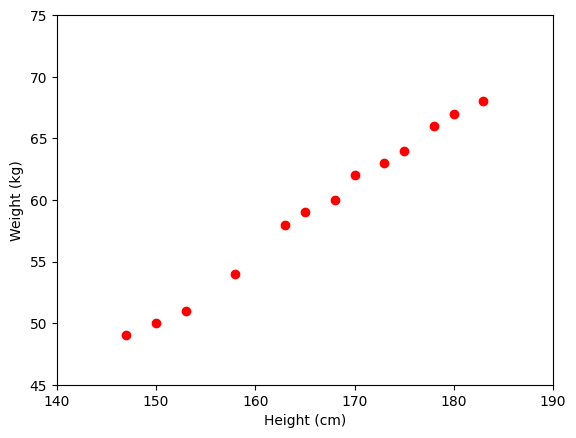

In [13]:
# Data: height and weight
# Height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]]).T
# Weight (kg)
y = np.array([[49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]]).T

# Visualize data
plt.plot(X, y, 'ro')  # the fitting line (red, circle)
plt.axis([140, 190, 45, 75]) # x-axis from 140 to 190, y-axis from 45 to 75
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [ ]:
# Building Xbar
one = np.ones((X.shape[0], 1)) # creating 1-valued matrix with the num of rows equal to the num of rows of X
Xbar = np.concatenate((one, X), axis = 1) # concatenating 2 matrices (one and X) horizontally (column) 
# axis = 0 -> vertical (dọc) (row)
# axis = 1 -> horizontal (ngang) (column)

Xbar

array([[  1., 147.],
       [  1., 150.],
       [  1., 153.],
       [  1., 158.],
       [  1., 163.],
       [  1., 165.],
       [  1., 168.],
       [  1., 170.],
       [  1., 173.],
       [  1., 175.],
       [  1., 178.],
       [  1., 180.],
       [  1., 183.]])

w =  [[-33.73541021]
 [  0.55920496]]


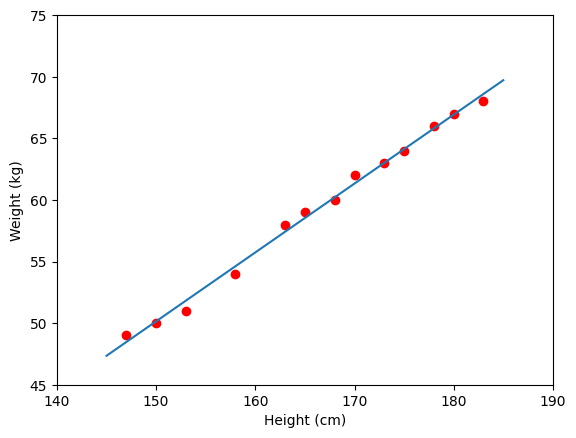

In [ ]:
# Calculating weights of the fitting line
A = np.dot(Xbar.T, Xbar) # multiplying 2 matrices
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

# Drawing graph
# Preparing the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(145, 185, 2) # x0 contains 2 values of x -> 145 and 185 (start and end point)
y0 = w_0 + w_1 * x0 # y0 contains 2 values of y corresponding to x0

# Drawing the fitting line
plt.plot(X.T, y.T, 'ro') # data
plt.plot(x0, y0) # the fitting line
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

## LINEAR REGRESSION (USING GRADIENT DESCENT)

In [59]:
import numpy as np
import matplotlib.pyplot as plt

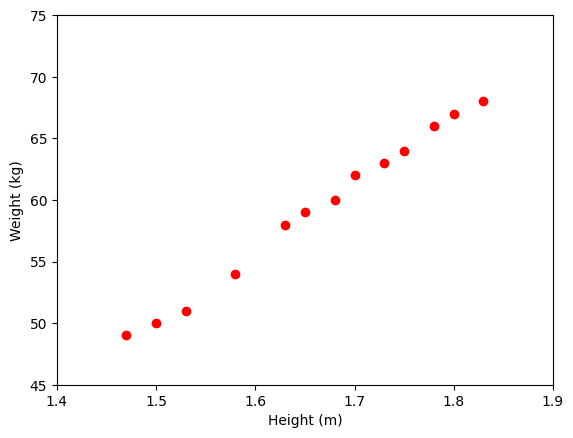

In [91]:
# Data: height and weight
# Height (m)
X = np.array([1.47, 1.50, 1.53, 1.58, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83])
# Weight (kg)
y = np.array([49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68])

# Visualize data
plt.plot(X, y, 'ro')
plt.axis([1.40, 1.90, 45, 75])
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.show()


# m = 100
# X = np.random.rand(m, 1) * 10

# noise = np.random.randn(m, 1) * 2
# y = 4 + 3 * X + noise 

# plt.plot(X, y, 'ro')

# plt.show()





In [ ]:
def compute_cost(X, y, w, b):
    num_samples = X.shape[0]
    cost = 0
    for i in range(num_samples):
        y_hat = w * X[i] + b
        cost += (y_hat - y[i]) ** 2
    cost /= (2 * num_samples)
    return cost

In [ ]:
# Gradient Descent
def compute_gradient(X, y, w, b):
    num_samples = X.shape[0]
    dw = 0
    db = 0
    for i in range(num_samples):
        y_hat = w * X[i] + b
        dw += (y_hat - y[i]) * X[i]
        db += (y_hat - y[i])
    dw /= num_samples
    db /= num_samples
    return dw, db

In [ ]:
def train(X, y, w_init, b_init, alpha, num_steps):
    w = w_init
    b = b_init

    for i in range(num_steps):
        dw, db = compute_gradient(w, b)

        w -= alpha * dw
        b -= alpha * db

        loss = compute_cost(X, y, w, b)
        if i % 100 == 0:
            print(f"Iteration {i}: w = {w}, b = {b}, loss = {loss}")
    return w, b

Iteration 0: w = 0.2484576923076923, b = 0.14826923076923076, loss = 1745.1721263887496
Iteration 100: w = 16.227548929889092, b = 9.663955217851932, loss = 266.3955567984883
Iteration 200: w = 22.42923879198377, b = 13.322891508963426, loss = 44.72144130298675
Iteration 300: w = 24.845427130514732, b = 14.714307539024487, loss = 11.485018911868167
Iteration 400: w = 25.795980935475917, b = 15.227835135808554, loss = 6.495123271617924
Iteration 500: w = 26.179076582092993, b = 15.401494120372826, loss = 5.7393505544731065
Iteration 600: w = 26.342458496821415, b = 15.443588093131629, loss = 5.618279183944673
Iteration 700: w = 26.420761919710387, b = 15.434765354562206, loss = 5.592361507101861
Iteration 800: w = 26.46611320767637, b = 15.406250262433339, loss = 5.580720158061826
Iteration 900: w = 26.498693985868183, b = 15.370131845914742, loss = 5.571231725375755
Final model params: w = 26.526054191094616, b = 15.33148823587032


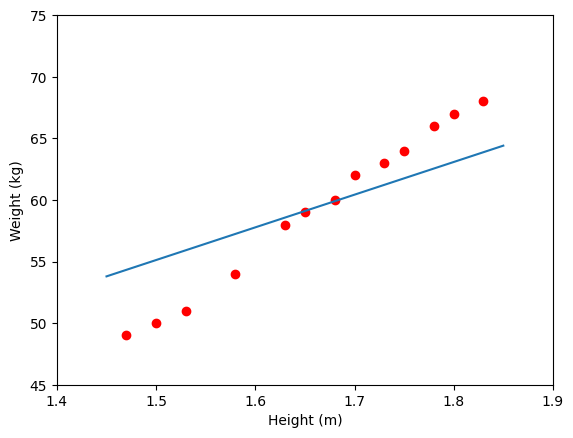

In [ ]:
w_init = 0
b_init = 0

w, b = train(X, y, w_init, b_init, 0.0025, 1000)

print(f"Final model params: w = {w}, b = {b}")

# Drawing graph
# Preparing the fitting line
x0 = np.linspace(1.45, 1.85, 2)
y0 = w * x0 + b

# Drawing the fitting line
plt.plot(X, y, 'ro')
plt.plot(x0, y0)
plt.axis([1.40, 1.90, 45, 75])
plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.show()

## LINEAR REGRESSION (USING GRADIENT DESCENT) - OOP STYLE

Iteration 0: w = 0.2484576923076923, b = 0.14826923076923076, loss = 1745.1721263887496
Iteration 100: w = 16.227548929889092, b = 9.663955217851932, loss = 266.3955567984883
Iteration 200: w = 22.42923879198377, b = 13.322891508963426, loss = 44.72144130298675
Iteration 300: w = 24.845427130514732, b = 14.714307539024487, loss = 11.485018911868167
Iteration 400: w = 25.795980935475917, b = 15.227835135808554, loss = 6.495123271617924
Iteration 500: w = 26.179076582092993, b = 15.401494120372826, loss = 5.7393505544731065
Iteration 600: w = 26.342458496821415, b = 15.443588093131629, loss = 5.618279183944673
Iteration 700: w = 26.420761919710387, b = 15.434765354562206, loss = 5.592361507101861
Iteration 800: w = 26.46611320767637, b = 15.406250262433339, loss = 5.580720158061826
Iteration 900: w = 26.498693985868183, b = 15.370131845914742, loss = 5.571231725375755


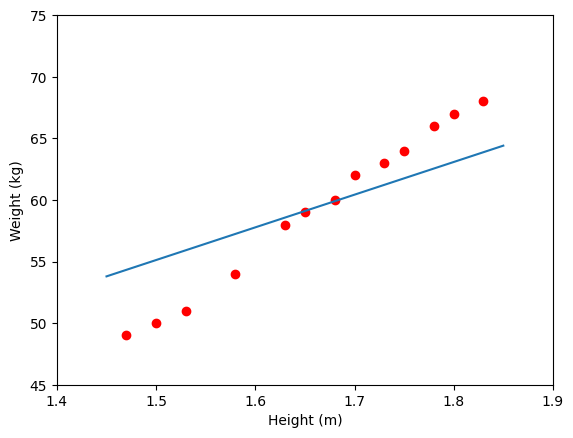

In [102]:
class LRByGradientDescent:
    def __init__(self):
        self.w_init = 0
        self.b_init = 0
    
    def compute_cost(self, X, y, w, b):
        num_samples = X.shape[0]
        cost = 0
        for i in range(num_samples):
            y_hat = w * X[i] + b
            cost += (y_hat - y[i]) ** 2
        cost /= (2 * num_samples)
        return cost
    
    def compute_gradient(self, X, y, w, b):
        num_samples = X.shape[0]
        dw = 0
        db = 0
        for i in range(num_samples):
            y_hat = w * X[i] + b
            dw += (y_hat - y[i]) * X[i]
            db += (y_hat - y[i])
        dw /= num_samples
        db /= num_samples
        return dw, db
    
    def train(self, X, y, alpha, num_steps):
        w = self.w_init
        b = self.b_init

        for i in range(num_steps):
            dw, db = self.compute_gradient(X, y, w, b)

            w -= alpha * dw
            b -= alpha * db

            loss = self.compute_cost(X, y, w, b)
            if i % 100 == 0:
                print(f"Iteration {i}: w = {w}, b = {b}, loss = {loss}")
        return w, b
    
    def drawGraph(self, X, y):
        x0 = np.linspace(1.45, 1.85, 2)
        y0 = w * x0 + b

        # Drawing the fitting line
        plt.plot(X, y, 'ro')
        plt.plot(x0, y0)
        plt.axis([1.40, 1.90, 45, 75])
        plt.xlabel('Height (m)')
        plt.ylabel('Weight (kg)')
        plt.show()

model = LRByGradientDescent()
model.train(X, y, 0.0025, 1000)
model.drawGraph(X, y)